### ***Xarray (Python package) Demo***

![](dataset-diagram-logo.png)

***More information:*** https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

* Xarray is very powerful for dealing with [(Network Common Data Form) netCDF (.nc) dataset](https://docs.unidata.ucar.edu/nug/current/netcdf_introduction.html), the contents I summarized here are only parts of Xarray that I think are basic.
* If you want more advanced skills, please explore the website listed above.

### ***What is Xarray ? (with comprehensible syntax)*** 

**From GPT-4:**

Xarray是一个Python库，提供了一套强大的数据结构和函数，用于处理标签化的多维数组数据。它的主要数据结构是DataArray和Dataset，它们都建立在NumPy和Pandas的基础之上，并且与Matplotlib和Cartopy等绘图库以及Dask等并行计算库深度集成。

Xarray的设计灵感主要来自于netCDF数据格式，这是一个在地球科学领域广泛使用的标准化数据格式。因此，xarray特别适合处理这种格式的数据，包括气候、气象、海洋科学等领域的数据。不过，xarray同样可以处理其他形式的科学和数值数据。

总的来说，xarray提供了一种简单而一致的方式来处理和分析大规模的多维数据，无论这些数据来自于哪种领域或格式。

=======================================================================================================================================================================================

### Firstly, lets's get started with ***data structure*** in Xarray by ***creating*** a Xarray dataset

In [1]:
# Import some useful packages
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
# Create a array with dimensions [4, 3]
data = np.random.rand(4, 3)

# Set the location information
locs = ["IA", "IL", "IN"] # Character strings 

# Set the time series

times = pd.date_range("2000-01-01", periods=4)

dataset = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])

In [3]:
dataset.attrs['description'] = 'random number array with dimension 4*3'
dataset

<xarray.DataArray (time: 4, space: 3)>
array([[0.04304105, 0.38043494, 0.79569823],
       [0.13591724, 0.50282392, 0.21694742],
       [0.38038436, 0.70452526, 0.93921557],
       [0.97535386, 0.96183551, 0.12341823]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    description:  random number array with dimension 4*3

### ***Some properties of Xarray dataset***


In [4]:
dataset.values # Then you will get a numpy array

array([[0.04304105, 0.38043494, 0.79569823],
       [0.13591724, 0.50282392, 0.21694742],
       [0.38038436, 0.70452526, 0.93921557],
       [0.97535386, 0.96183551, 0.12341823]])

In [5]:
type(dataset)

xarray.core.dataarray.DataArray

In [6]:
type(dataset.values)

numpy.ndarray

In [7]:
dataset.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

***We can update a dataset in-place using Python's standard dictionary syntax***

In [8]:
temp = 25 + np.random.rand(4, 4, 3)
precip = 100 + np.random.rand(4, 4, 3)
lat = np.random.rand(4, 4)
lon = np.random.rand(4, 4)
timx = np.random.rand(3)

ds = xr.Dataset()

ds["temperature"] = (("x", "y", "time"), temp) # Variable, Coordinate, Value

ds["temperature_double"] = (("x", "y", "time"), temp * 2)

ds["precipitation"] = (("x", "y", "time"), precip)

ds.coords["lat"] = (("x", "y"), lat)

ds.coords["lon"] = (("x", "y"), lon)

ds.coords["time"] = pd.date_range("2014-09-06", periods=3)

ds.coords["reference_time"] = pd.Timestamp("2014-09-05")


In [9]:
ds

<xarray.Dataset>
Dimensions:             (x: 4, y: 4, time: 3)
Coordinates:
    lat                 (x, y) float64 0.3583 0.3253 0.7428 ... 0.6185 0.3511
    lon                 (x, y) float64 0.8139 0.5421 0.2729 ... 0.9516 0.927
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.66 25.68 25.16 ... 25.95 25.04
    temperature_double  (x, y, time) float64 51.33 51.35 50.32 ... 51.91 50.09
    precipitation       (x, y, time) float64 100.6 100.7 100.6 ... 100.8 100.2

***Transforming datasets***

In [10]:
ds[["temperature"]]

<xarray.Dataset>
Dimensions:         (x: 4, y: 4, time: 3)
Coordinates:
    lat             (x, y) float64 0.3583 0.3253 0.7428 ... 0.4841 0.6185 0.3511
    lon             (x, y) float64 0.8139 0.5421 0.2729 ... 0.515 0.9516 0.927
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 25.66 25.68 25.16 ... 25.27 25.95 25.04

In [11]:
ds[["temperature", "temperature_double"]]

<xarray.Dataset>
Dimensions:             (x: 4, y: 4, time: 3)
Coordinates:
    lat                 (x, y) float64 0.3583 0.3253 0.7428 ... 0.6185 0.3511
    lon                 (x, y) float64 0.8139 0.5421 0.2729 ... 0.9516 0.927
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.66 25.68 25.16 ... 25.95 25.04
    temperature_double  (x, y, time) float64 51.33 51.35 50.32 ... 51.91 50.09

In [12]:
ds.drop_vars("temperature")

<xarray.Dataset>
Dimensions:             (x: 4, y: 4, time: 3)
Coordinates:
    lat                 (x, y) float64 0.3583 0.3253 0.7428 ... 0.6185 0.3511
    lon                 (x, y) float64 0.8139 0.5421 0.2729 ... 0.9516 0.927
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 51.33 51.35 50.32 ... 51.91 50.09
    precipitation       (x, y, time) float64 100.6 100.7 100.6 ... 100.8 100.2

In [13]:
ds.drop_dims("time") # Any variables using this dimension will be removed.

<xarray.Dataset>
Dimensions:         (x: 4, y: 4)
Coordinates:
    lat             (x, y) float64 0.3583 0.3253 0.7428 ... 0.4841 0.6185 0.3511
    lon             (x, y) float64 0.8139 0.5421 0.2729 ... 0.515 0.9516 0.927
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [14]:
ds.assign(temperature2=2 * ds.temperature) # Add another variable by 'assign'

<xarray.Dataset>
Dimensions:             (x: 4, y: 4, time: 3)
Coordinates:
    lat                 (x, y) float64 0.3583 0.3253 0.7428 ... 0.6185 0.3511
    lon                 (x, y) float64 0.8139 0.5421 0.2729 ... 0.9516 0.927
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.66 25.68 25.16 ... 25.95 25.04
    temperature_double  (x, y, time) float64 51.33 51.35 50.32 ... 51.91 50.09
    precipitation       (x, y, time) float64 100.6 100.7 100.6 ... 100.8 100.2
    temperature2        (x, y, time) float64 51.33 51.35 50.32 ... 51.91 50.09

***You can modify the dataset values by adding, subtracting, multiplying and dividing, etc.***

In [15]:
dataset.values = dataset.values**2
dataset.values

array([[0.00185253, 0.14473075, 0.63313567],
       [0.0184735 , 0.2528319 , 0.04706618],
       [0.14469226, 0.49635584, 0.88212589],
       [0.95131514, 0.92512756, 0.01523206]])

In [16]:
dataset.values = np.exp(dataset.values)
dataset.values

array([[1.00185425, 1.15572834, 1.88350739],
       [1.01864519, 1.2876668 , 1.04819138],
       [1.15568387, 1.642724  , 2.41603047],
       [2.58911247, 2.52218996, 1.01534866]])

***Now fill in some of that missing metadata:***

In [17]:
dataset.name = "temperature"
dataset.attrs["units"] = "Celcius"
dataset

<xarray.DataArray 'temperature' (time: 4, space: 3)>
array([[1.00185425, 1.15572834, 1.88350739],
       [1.01864519, 1.2876668 , 1.04819138],
       [1.15568387, 1.642724  , 2.41603047],
       [2.58911247, 2.52218996, 1.01534866]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    description:  random number array with dimension 4*3
    units:        Celcius

***Using 'pipe' will make things easy!***

<xarray.DataArray 'temperature' (y: 4, time: 3)>
array([[25.55770322, 25.48564702, 25.44715521],
       [25.63042583, 25.67608675, 25.30755418],
       [25.59484912, 25.22663279, 25.37155456],
       [25.25712137, 25.38076678, 25.55982557]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: y

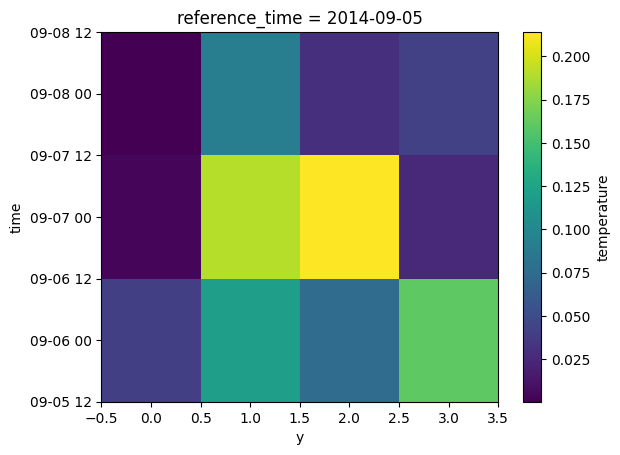

In [18]:
import matplotlib.pyplot as plt

# Create a Xarray dataset

# Define some functions

def multiply_by_2(arr):
    return arr * 2

def subtract_mean(arr):
    return arr - arr.mean()

def square(arr):
    return arr ** 2

# Apply above functions by using 'pipe' method

ds.temperature.mean('x').pipe(multiply_by_2).pipe(subtract_mean).pipe(square).plot(x = ds.temperature.dims[1])

ds.temperature.mean('x')


### ***Let's look at a specific case (Sea Surface Temperature)***

In [19]:
# Check the structure of the NC dataset

data = xr.open_dataset("air_temperature.nc")
data

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

***How to index and select data***

In [20]:
# Indexing by integer array indices (isel)
data.isel(lat=0, lon=slice(3, 17), time=slice(None, 2)) # slice(None, 2) means indexing time dimension from 0 to 2 (2 is not included).

<xarray.Dataset>
Dimensions:  (time: 2, lon: 14)
Coordinates:
    lat      float32 75.0
  * lon      (lon) float32 207.5 210.0 212.5 215.0 ... 232.5 235.0 237.5 240.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Data variables:
    air      (time, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [21]:
# Indexing by dimension coordinate labels (sel)

data.sel(time=slice("2013-01-01", "2013-01-02"))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 8, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-02T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

***Nearest neighbor lookups***

In [34]:
data.air.sel(lon = 231)


KeyError: "not all values found in index 'lon'. Try setting the `method` keyword argument (example: method='nearest')."

***Mask with “where”***

(array([3285000.,       0.,       0.,       0.,       0.,       0.,
              0.,    5173.,   94623.,  484204.]),
 array([  1.        ,  31.14999962,  61.29999924,  91.44999695,
        121.59999847, 151.75      , 181.8999939 , 212.05000305,
        242.19999695, 272.3500061 , 302.5       ]),
 <BarContainer object of 10 artists>)

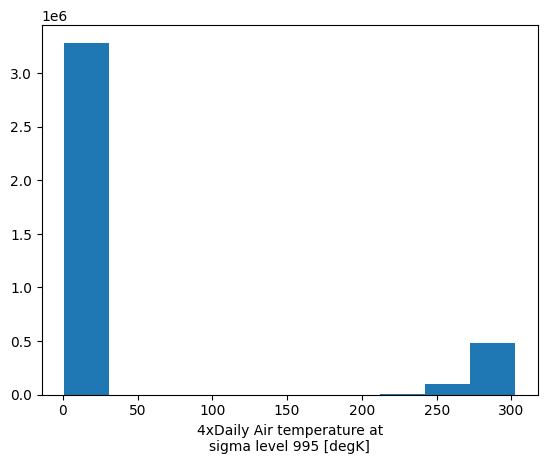

In [35]:
data.air.where(data.lon < 220, data.lat<80)

In [36]:
mask = data["time"] > np.datetime64("2013-01-05T06:00:00.000000000")
masked_data = data.where(mask) #  For cases where the selected data size is much smaller than the original data, use of the option drop=True clips coordinate elements that are fully masked.
masked_data

<xarray.Dataset>
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

***Data interpolation***

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

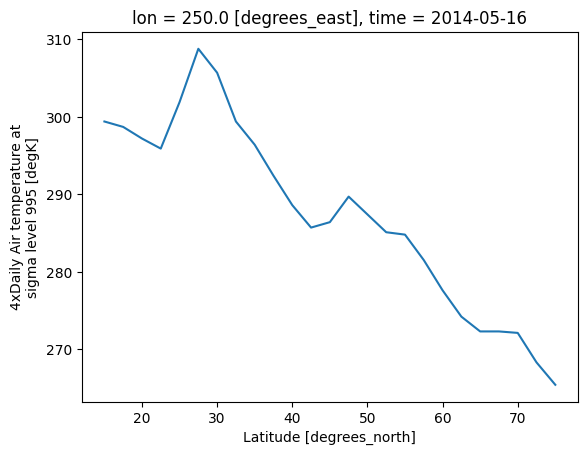

In [25]:
data = xr.open_dataset("/home/zhengwei/scratch/Demo_Xarray/Xarray_Demo/air_temperature.nc")
data.air.isel(time = 2000).isel(lon = 20).plot()
data.air.lat

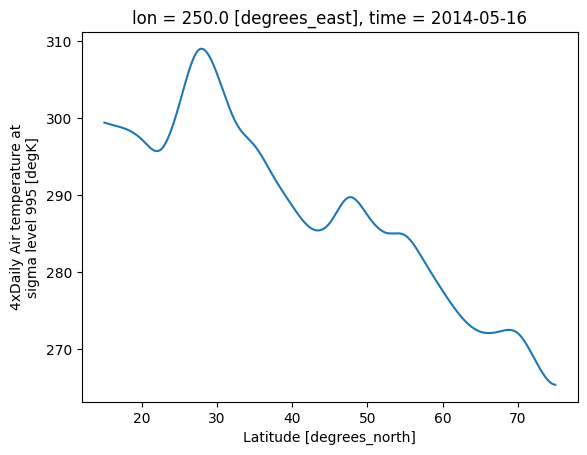

In [26]:
data = xr.open_dataset("air_temperature.nc")
data.air.isel(time = 2000).isel(lon = 20).interp(lat = np.linspace(15, 75, 500), method = 'cubic').plot()

Text(0.5, 1.0, 'Interpolated data')

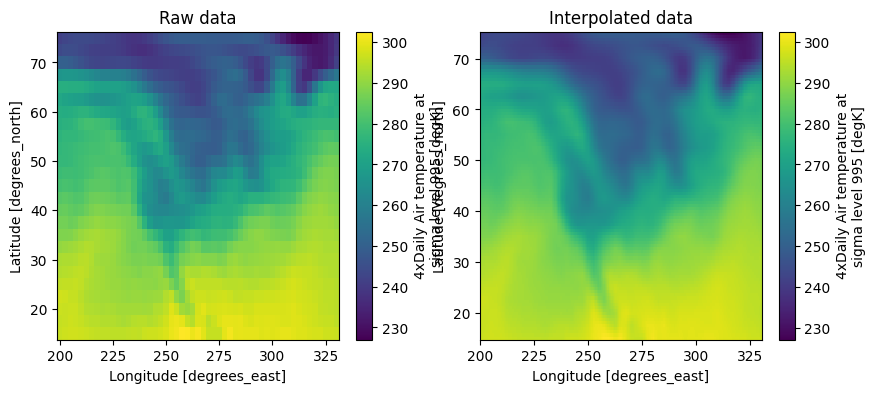

In [27]:
ds = data.isel(time=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])

axes[0].set_title("Raw data")

new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 4)

new_lat = np.linspace(ds.lat[0], ds.lat[-1], ds.dims["lat"] * 4)

dsi = ds.interp(lat=new_lat, lon=new_lon)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Interpolated data")

***Rolling opereation***

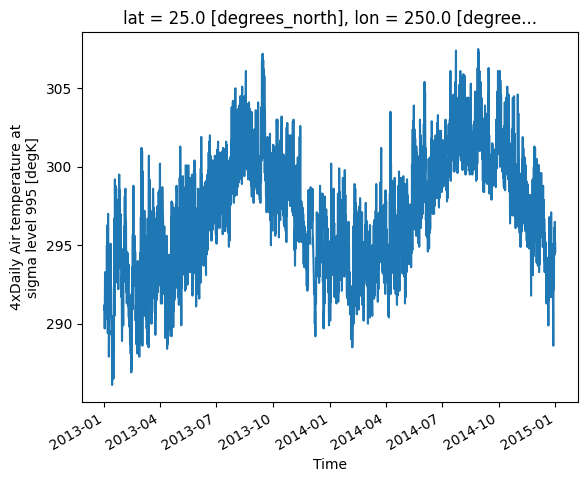

In [28]:
data = xr.open_dataset("air_temperature.nc")
data.air.isel(lon = 20).isel(lat = 20).plot()

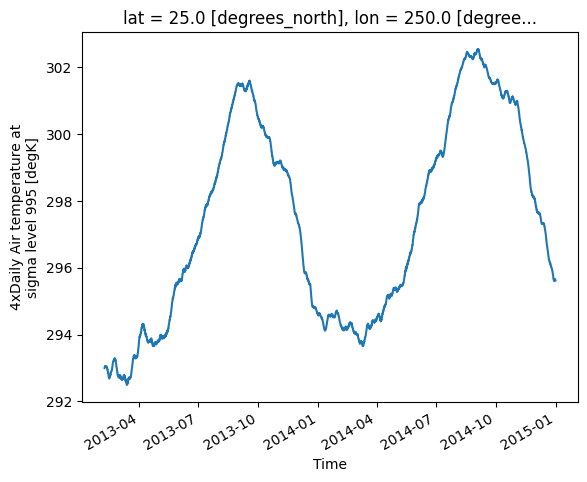

In [37]:
data = xr.open_dataset("air_temperature.nc")
data.air.isel(lon = 20).isel(lat = 20).rolling(time = 150).mean().plot()

***Weighted average***

In [30]:
coords = dict(month=("month", [1, 2, 3]))

prec = xr.DataArray([1.1, 1.0, 0.9], dims=("month",), coords=coords)

weights = xr.DataArray([31, 28, 31], dims=("month",), coords=coords)

weighted_prec = prec.weighted(weights)

weighted_prec.mean(dim="month")

<xarray.DataArray ()>
array(1.)

In [31]:
weighted_prec.sum()

<xarray.DataArray ()>
array(90.)

***Differentiate***

For more information about difference shcemes, you can click:  https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

In [32]:
a = xr.DataArray([0, 1, 2, 3, 4, 5], dims=["x"], coords=[[0.1, 0.11, 0.2, 0.3, 0.41, 0.5]])

a

a.differentiate("x")

<xarray.DataArray (x: 6)>
array([100.        ,  91.11111111,  10.58479532,   9.56709957,
        10.2020202 ,  11.11111111])
Coordinates:
  * x        (x) float64 0.1 0.11 0.2 0.3 0.41 0.5

***Groupby*** (really useful for calculating ***climatology***)

***Firstly, what is climatology?***

Climatology refers to the average of a certain meteorological element (such as temperature, precipitation, etc.) over a period of time (usually decades or more). It is a statistical description of long-term climate conditions and is used to describe the typical climate characteristics of an area.

***Secondly, why we need to calculate climatology?***

When analyzing climate data, we usually remove the mean of the climate state, because the mean of the climate state represents long-term climate conditions, and we are often more concerned with climate changes and anomalies. Removing the mean value of climate states can highlight the changing trend of climate data and facilitate better analysis and understanding of the characteristics of climate change.

In [33]:
# We can merge different nc files into one file and open it by using 'xr.open_mfdataset'
import xarray as xr
import matplotlib
data = xr.open_mfdataset("air.sig995.*.nc")

# Calculate climatology
t = data.air
t_month = t.resample(time = '1M').mean()

t_clim = t_month.groupby('time.month').mean(dim = 'time')

# Calculate anomalies
t_anom = t_month.groupby('time.month') - t_clim

%matplotlib inline
t_anom[4].plot()

ModuleNotFoundError: No module named 'dask'

In [ ]:
t_anom

In [ ]:
t_anom.sel(lon = 100, lat = 20, method = 'nearest').plot(marker = '.' , color = 'tab:red')

### ***OPeNDAP***

A useful function which let us access large datasets over HTTP without downloading but needs some time......

***From GPT:***

在xarray中使用opendap可以带来以下优点：

延迟加载：使用opendap，您可以在不必事先下载整个数据集的情况下访问数据。数据只在需要时被加载，这可以节省磁盘空间和下载时间。

分布式数据访问：opendap允许从远程服务器访问和检索数据，这意味着您可以直接从数据提供者的服务器上获取数据，而无需下载和存储数据。

跨平台兼容性：opendap是一种基于HTTP协议的数据访问协议，因此可以在多个平台和操作系统上使用。这使得使用xarray和opendap更加方便和灵活。

数据子集选择：使用opendap，您可以选择仅下载和加载感兴趣的数据子集，而不必下载整个数据集。这对于大型数据集非常有用，因为可以减少数据传输和处理的时间和资源。

总的来说，opendap使得在使用xarray进行数据分析和处理时更加方便和高效，因为它提供了一种灵活的方式来访问和处理远程数据，而无需事先下载和存储数据。

In [ ]:
remote_data = xr.open_dataset(
    "http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods",
    decode_times=False,
)

remote_data

In [ ]:
tmax = remote_data["tmax"][:500, ::3, ::3] ### A little slow

tmax

tmax[0].plot()

A OPeNDAP example from PSL Climate Data Repository (NOAA) (https://psl.noaa.gov/repository/entry/show?entryid=2e95e18c-b68f-4330-acef-3c566741ff7d)

![](3071700718712_.pic.jpg)

In [ ]:
temperature_data = xr.open_dataset(
    "https://psl.noaa.gov/repository/opendap/2e95e18c-b68f-4330-acef-3c566741ff7d/entry.das",
    decode_times=False,
)

In [ ]:
temperature_data

### Make animation easier - xmovie ! 

For more information: https://xmovie.readthedocs.io/en/latest/examples/parallel.html

In [ ]:
import xarray as xr
from xmovie import Movie
import time


# You can easily create a movie by using 'xmovie' package
data = xr.open_dataset('air_temperature.nc')
mov_parallel = Movie(data.air.isel(time = slice(1, 30)).chunk({'time':1}), vmin=230, vmax=310)

mov_parallel.save(
    'movie_parallel.mp4',
    parallel=True,
    overwrite_existing=True,
)


### ***Make things faster - DASK***

***Firstly, what is DASK array?***

From GPT:

Dask Array是一个用于处理大型数据集的库，***它提供了一种在计算机集群或单个计算机的多核处理器上进行并行计算的方式***。它通过将大型数据集划分为小块，然后将计算任务分发到多个计算资源上，从而实现了高效的并行计算。

Dask Array的主要好处包括：

处理大型数据集：Dask Array可以处理远远超过内存大小的数据集，***它将数据划分为小块，并将计算任务分发到多个计算资源上进行并行计算***。这使得我们能够处理比内存更大的数据集，而不会导致内存溢出或性能下降。

延迟计算：Dask Array使用了惰性计算的方式，即在执行计算之前不会立即执行。***它会构建一个计算图，记录计算操作，只有在需要结果时才会执行计算***。这种延迟计算的方式可以帮助我们节省时间和资源，在需要时才执行计算，避免了不必要的计算。

并行计算：Dask Array充分利用了计算资源，可以在多个计算资源上并行执行计算任务。它能够将计算任务分发到计算机集群或单个计算机的多核处理器上，并自动管理任务调度和结果合并。这种并行计算的方式大大加快了计算速度，提高了效率。

与NumPy兼容：Dask Array提供了与NumPy类似的接口和功能，因此可以很容易地将现有的NumPy代码转换为Dask Array代码。这使得我们能够利用Dask Array的并行计算能力来处理大型数据集，而无需更改现有的代码。

总而言之，Dask Array是一个强大的工具，可以帮助我们处理大型数据集，并在计算资源上进行高效的并行计算。它的好处包括处理大型数据集、延迟计算、并行计算和与NumPy兼容。

In [ ]:
### An example

ds = xr.open_dataset("air_temperature.nc", chunks={"time": 10})

ds

In [ ]:
### To open multiple files simultaneously in parallel using DASK delayed, use open_mfdataset()

import xarray as xr

data = xr.open_mfdataset('air.sig995.*.nc', parallel= True)
data.air

In [ ]:
### You can also check the progress

from dask.diagnostics import ProgressBar

delayed_obj = xr.open_mfdataset('air.sig995.*.nc', parallel= True)
with ProgressBar():
    results = delayed_obj.air.mean().compute()

### ***Plotting***

# One dimension

In [ ]:

ds = xr.open_dataset("air_temperature.nc")
ds.air.isel(lat=10, lon=10).plot()

In [ ]:
ds = xr.open_dataset("air_temperature.nc")
ds.air[0:200].isel(lat=10, lon=10).plot.line("b-^")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=2)

axs

air_1d = ds.air.isel(lat=10, lon=10)

air_1d.plot(ax=axs[0])
axs[0].set_title('1')

air_1d.plot.hist(ax=axs[1])
axs[1].set_title('2')

plt.draw()

In [ ]:
### Multiple lines showing variation along a dimension

ds.air.isel(lon=10, lat=[19, 21, 22]).plot.line(x="time")

# Two dimensions

In [ ]:
air2d = ds.air.isel(time=500)

air2d.plot(cmap = 'jet')

In [ ]:
air2d.plot(cmap = 'jet', yincrease = False)

In [ ]:
### Missing values

bad_air2d = air2d.copy()

bad_air2d[dict(lat=slice(0, 10), lon=slice(0, 25))] = np.nan

bad_air2d.plot()


### Option "Robust"

Outliers often have an extreme effect on the output of the plot. Here we add two bad data points. This affects the color scale, washing out the plot.

In [ ]:
air_outliers = ds.air.isel(time=0)

air_outliers[0, 0] = 100

air_outliers[-1, -1] = 400

air_outliers.plot()

In [ ]:
air_outliers.plot(robust=True)

In [ ]:
air_outliers.plot.contourf(robust=True, levels = 100)

In [ ]:
t_season = ds.air.groupby('time.season').mean(dim='time') - 273.15

# facet plot allows to do multiplot with the same color mappings
t_season.plot.contourf(x='lon', y='lat', col='season', col_wrap=2, levels=100)

### Xarray on GPUs!!!

***CuPy*** has been installed in base(Python 3.9.17) environment, if you want to use it, please check the kernel firstly.

For more information, please refer to the tutorial: https://negin513.github.io/cupy-xarray-tutorials/notebooks/Notebook0_Introduction.html

![](3081700734074_.pic.jpg)